# Numpy and Pandas - Assignment 4a
In this assignment, we will use pandas and numpy to do some fairly basic analysis on historical weather data from Meteostat. Meteostat is a  tool for accessing weather and climate data, much like how we used Yahoo Finance in class to retrieve stock market data.

Before you begin:
- Ensure you have installed the Meteostat package by running `!pip install meteostat` if you haven't already.
  
- Familiarize yourself with the Meteostat Python package by reviewing its documentation: [Meteostat Python Library](https://dev.meteostat.net/python/).


In [64]:
# !pip install meteostat

<div class="alert alert-block alert-info">
<b>Attention:</b> 
    
Please read and follow the instructions carefully to avoid point deduction.
    
You are encouraged to use class materials and online resources to help you with this assignment. However, copying code directly from Generative AI (ChatGPT, Llama, etc.) or coding websites (Stack Overflow, GitHub, etc.) is strictly forbidden. We TAs have used these tools to generate answers for this assignment, so we WILL know if you directly copy or plagiarize your code. If we suspect any dishonest conduct, we reserve the right to call you in during office hours for a code review. If you fail to explain your code, we reserve the right to give you a 0 for the assignment. 

Feel free to email us or come to our office hours if you have any questions regarding this assignment.
</div>

## Imports

In [2]:
from datetime import datetime 
import numpy as np
import pandas as pd
from meteostat import Daily,Point 
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

## Getting Data

- Use the **Point** object provided below to specify New York's location.
  
- Fetch the weather data for the date range **January 1, 2021** to **December 31, 2021**.
  
- Store the resulting data in a pandas DataFrame called `nyc_weather`.
  
- Retain only the following columns: `tavg` (average temperature), `tmin` (minimum temperature), `tmax` (maximum temperature), and `prcp` (precipitation).
  
- **Print** the first 5 rows of the DataFrame to inspect the data.

            tavg  tmin  tmax  prcp  snow   wdir  wspd  wpgt    pres  tsun
time                                                                     
2021-01-01   3.6   2.2   4.4  17.3   0.0   36.0  13.2   NaN  1029.4   NaN
2021-01-02   6.3   3.3  12.2   6.1   0.0  319.0  11.6   NaN  1012.9   NaN
2021-01-03   3.4   2.8   4.4   5.7   0.0   33.0  22.4   NaN  1017.1   NaN
2021-01-04   4.6   2.8   7.2   0.7   0.0    7.0   8.1   NaN  1015.0   NaN
2021-01-05   4.4   3.3   5.6   0.0   0.0    0.0   8.1   NaN  1013.5   NaN
             tavg        tmin        tmax        prcp        snow        wdir  \
count  365.000000  365.000000  365.000000  365.000000  365.000000  365.000000   
mean    14.242740   10.815068   18.281096    3.238082   13.315068  208.967123   
std      9.091611    8.897565    9.814272    7.620515   59.666858  109.512702   
min     -4.600000   -7.200000   -2.200000    0.000000    0.000000    0.000000   
25%      5.800000    2.800000    9.100000    0.000000    0.000000   89.000000

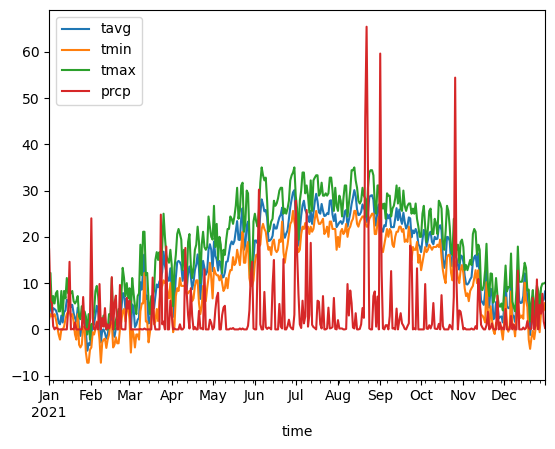

In [3]:
new_york = Point(40.7128, -74.0060)
# Your code here

# Set time period
start = datetime(2021, 1, 1)
end = datetime(2021, 12, 31)

nyc_weather = Daily(new_york, start, end)
nyc_weather = nyc_weather.fetch()

print(nyc_weather.head())
print(nyc_weather.describe())

# Plot line chart including average, minimum and maximum temperature
nyc_weather.plot(y=['tavg', 'tmin', 'tmax', 'prcp'])
plt.show()

## Part 1: Analyzing One Year of Data


### Calculate Monthly Average Temperature and Standard Deviations using column `tavg`.
- Which month(s) had the **highest mean temperature**?
  
- Which month(s) had the **most variable temperatures (highest std dev)**?
  
- **Print** the results, and do not find the month(s) by just eyeballing the result.

In [4]:
# Your code here

# print(nyc_weather.index.month)

monthly_data = nyc_weather.groupby(nyc_weather.index.month)['tavg']
# print(monthly_data.describe())

months = ["January", "February", "March", "April", "May", "June",
          "July", "August", "September", "October", "November", "December"]

monthly_stats = monthly_data.agg(['mean', 'std'])

highest_mean_month = monthly_stats["mean"].idxmax()

print("\nMonth with the highest mean temperature :")
print(f"{months[int(highest_mean_month) - 1]} (Mean: {monthly_stats['mean'][highest_mean_month]:.2f}°C)")


most_variable_month = monthly_stats["std"].idxmax()

print("\nMonth with the most variable temperatures :")
print(f"{months[int(most_variable_month) - 1]} (Std Dev: {monthly_stats['std'][most_variable_month]:.2f}°C)")



Month with the highest mean temperature :
August (Mean: 25.60°C)

Month with the most variable temperatures :
March (Std Dev: 4.77°C)


### Calculate Monthly Total Precipitation Using Column `prcp`.

- Which month(s) had the **highest total precipitation**?
  
- **Print** the results, and do not find the month(s) by just eyeballing the result.


In [7]:
# Your code here
monthly_data = nyc_weather.groupby(nyc_weather.index.month)['prcp']

months_dict = {month: 0 for month in months}
 

for month, daily_prcp in monthly_data:
    # print(month)
    # print(daily_prcp)
    months_dict[months[month - 1]] = daily_prcp.sum()


max_precipitation_month = max(months_dict, key=months_dict.get)

print(f"Max precipitation month: {max_precipitation_month} with {months_dict[max_precipitation_month]:.2f} mm")

Max precipitation month: August with 211.00 mm


### Identify and categorize dates by extreme weather

- Define a function to do the grouping as instructed below, adding a new column to the DataFrame will not be accepted.
  
    - When the maximum temperature (tmax) is above 90°F (32°C), the date is grouped into "**Hot**"
      
    - When the minimum temperature (tmin) is below 20°F (-6°C), the date is grouped into "**Cold**"
      
    - Else, group it into "**Non_extreme**"
      
- You may change the setting of parameters of the function.

In [9]:
def group_by_func(ind, df):
    # Your code here
    # tmax = df["tmax"][ind]
    tmax = df.loc[ind, "tmax"]
    tmin = df.loc[ind, "tmin"]
    
    # The mean minimum/maximum air temperature in °C on the documentation
    if tmax > 32:
        return "Hot"
    elif tmin < -6:
        return "Cold"
    else:
        return "Non_extreme"

- Apply the temperature_group function from earlier to the `nyc_weather`.
  
- How many days fall into each category: "Hot", "Cold", and "Non_extreme"?
  
- **Print the results**

In [10]:
# Your code here

grouped_data = nyc_weather.groupby(lambda ind: group_by_func(ind, nyc_weather))

grouped_df = grouped_data.size().reset_index()

grouped_df.columns = ["Temperature", "Count"]

print(grouped_df)
print(grouped_data.groups)
print(grouped_data.get_group("Cold").head())

   Temperature  Count
0         Cold      3
1          Hot     25
2  Non_extreme    337
{'Cold': [2021-01-29 00:00:00, 2021-01-30 00:00:00, 2021-02-08 00:00:00], 'Hot': [2021-06-06 00:00:00, 2021-06-07 00:00:00, 2021-06-08 00:00:00, 2021-06-09 00:00:00, 2021-06-27 00:00:00, 2021-06-28 00:00:00, 2021-06-29 00:00:00, 2021-06-30 00:00:00, 2021-07-06 00:00:00, 2021-07-07 00:00:00, 2021-07-12 00:00:00, 2021-07-14 00:00:00, 2021-07-15 00:00:00, 2021-07-16 00:00:00, 2021-07-17 00:00:00, 2021-07-26 00:00:00, 2021-07-27 00:00:00, 2021-08-11 00:00:00, 2021-08-12 00:00:00, 2021-08-13 00:00:00, 2021-08-14 00:00:00, 2021-08-24 00:00:00, 2021-08-25 00:00:00, 2021-08-26 00:00:00, 2021-08-27 00:00:00], 'Non_extreme': [2021-01-01 00:00:00, 2021-01-02 00:00:00, 2021-01-03 00:00:00, 2021-01-04 00:00:00, 2021-01-05 00:00:00, 2021-01-06 00:00:00, 2021-01-07 00:00:00, 2021-01-08 00:00:00, 2021-01-09 00:00:00, 2021-01-10 00:00:00, 2021-01-11 00:00:00, 2021-01-12 00:00:00, 2021-01-13 00:00:00, 2021-01-14 00:0

- Create a new column as the temperature difference (tmax-tmin) in a day call `temp_diff`.
  
- Use the grouping above to calculate the mean of temperature difference.
  
- Which group has the **highest average temperature difference**?
  
- **Print** the results, and do not find the group by just eyeballing the result.

In [14]:
# Your code here

nyc_weather["temp_diff"] = nyc_weather["tmax"] - nyc_weather["tmin"]

weather_categories = nyc_weather.index.to_series().apply(lambda ind: group_by_func(ind, nyc_weather))
print(weather_categories.describe())

temp_diff_means = nyc_weather.groupby(weather_categories)["temp_diff"].mean()

max_diff_group = temp_diff_means.idxmax()

print("\nAverage Temperature Difference by Category:")
print(temp_diff_means)

print(f"\nGroup with the highest average temperature difference: {max_diff_group} ({temp_diff_means[max_diff_group]:.2f}°C)")

count             365
unique              3
top       Non_extreme
freq              337
Name: time, dtype: object

Average Temperature Difference by Category:
time
Cold            8.500000
Hot            10.004000
Non_extreme     7.268546
Name: temp_diff, dtype: float64

Group with the highest average temperature difference: Hot (10.00°C)


## Part 2: Comparing with Other Cities

- Now, import weather data of the same year (2021) from other cities. All the Points are provided in the following dictionary `cities_points`.
  
- Keep only the '**tavg**' column.
  
- Merge the daily temerature data of all cities into a Dataframe called `city_merged`. You can use methods like join, merge or concat.
  
- **Rename the columns using city names before merging**.
  
- **Print** the first 5 rows of `city_merged`.

In [106]:
cities_points = {'New York': Point(40.7128, -74.0060),
                 'Los Angeles': Point(34.0522, -118.2437),
                 'Chicago': Point(41.8781, -87.6298),
                 'Washington, DC': Point(38.9072, -77.0369),
                 'Seattle': Point(47.6062, -122.3321), 
                 'Houston' : Point(29.7604, -95.3698),
                 'Boston': Point(42.3601, -71.0589),
                 'Philadelphia': Point(39.9526, -75.1652)}

In [114]:
# Your code here

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # warnings stressing me out haha

start = datetime(2021, 1, 1)
end = datetime(2021, 12, 31)

city_dfs = {}

for city, point in cities_points.items():
    data = Daily(point, start, end).fetch()
    data = data[['tavg']]
    data = data.rename(columns={'tavg': city}) 
    city_dfs[city] = data

# print(city_dfs)
city_merged = pd.concat(city_dfs.values(), axis=1)

print(city_merged.head())

            New York  Los Angeles  Chicago  Washington, DC  Seattle  Houston  \
time                                                                           
2021-01-01       3.6         13.4     -0.4             3.7      8.6      7.8   
2021-01-02       6.3         12.8      0.9             6.2      8.8      8.4   
2021-01-03       3.4         13.2      0.1             5.6      6.2      9.4   
2021-01-04       4.6         12.7     -2.6             4.5      7.9     15.4   
2021-01-05       4.4         12.6      0.3             5.3      6.3     14.1   

            Boston  Philadelphia  
time                              
2021-01-01     1.0           1.6  
2021-01-02     3.8           6.8  
2021-01-03     0.4           3.4  
2021-01-04     0.9           3.7  
2021-01-05    -0.2           4.6  


### Compute Daily Change Using `tavg`

- For each city, calculate the **difference** between today's average temperature and yesterday's average temperature.
  
- Store the result in a new DataFrame called `diff`.
  
-  **Print** the first 5 rows of `diff`.

In [124]:
# Your code here

diff = city_merged.diff() # used a lot for stationnarity in time series analysis

# we could have done the following
# for city in city_merged.columns:
#     diff[city] = [city_merged[city].iloc[i] - city_merged[city].iloc[i - 1] for i in range(1, len(city_merged))]

print(diff.head())

            New York  Los Angeles  Chicago  Washington, DC  Seattle  Houston  \
time                                                                           
2021-01-01       NaN          NaN      NaN             NaN      NaN      NaN   
2021-01-02       2.7         -0.6      1.3             2.5      0.2      0.6   
2021-01-03      -2.9          0.4     -0.8            -0.6     -2.6      1.0   
2021-01-04       1.2         -0.5     -2.7            -1.1      1.7      6.0   
2021-01-05      -0.2         -0.1      2.9             0.8     -1.6     -1.3   

            Boston  Philadelphia  
time                              
2021-01-01     NaN           NaN  
2021-01-02     2.8           5.2  
2021-01-03    -3.4          -3.4  
2021-01-04     0.5           0.3  
2021-01-05    -1.1           0.9  


### Find Most Correlated City with New York
- Which city has the **highest correlation** (in terms of daily difference) with '**New York**'?
  
- Store the city as `city_2`
  
- **Print** the city name, and do not find the city by just eyeballing the result.
  
- Keep in mind the correlation between a city and itself is 1.

In [154]:
# Your code here

correlation_matrix = diff.corr()

# print(correlation_matrix)

# print("Available city names:", correlation_matrix.columns.tolist())

# print(correlation_matrix.loc["New York"])

correlation_matrix_no_self = correlation_matrix.drop(index="New York")#, columns="New York")

# print(correlation_matrix_no_self)

city_2 = correlation_matrix_no_self["New York"].idxmax()
print(f"City most correlated with New York (daily temperature differences) : {city_2}")


City most correlated with New York (daily temperature differences) : Philadelphia


### Do a Regression of city_2 on New York
- With y = city_2's daily change, X = New York's daily change, build an OLS model to do the regression.
  
- Remember to add intercept to X.
  
- **Print** the result.

                            OLS Regression Results                            
Dep. Variable:           Philadelphia   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     1047.
Date:                Mon, 10 Mar 2025   Prob (F-statistic):          6.98e-109
Time:                        16:17:12   Log-Likelihood:                -652.26
No. Observations:                 364   AIC:                             1309.
Df Residuals:                     362   BIC:                             1316.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0124      0.076      0.163      0.8

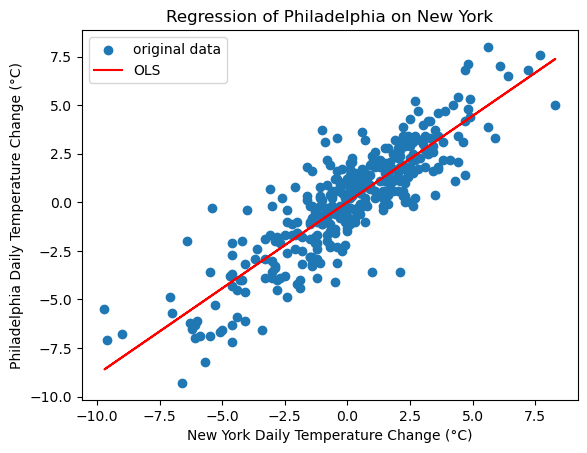

In [164]:
# Your code here

import statsmodels.api as sm

# Define X (independent) and y (dependent)
X = diff["New York"].dropna()  # predictor variable
y = diff[city_2].dropna()  # target variable we wanna predict

# adding the intercept to X --> y = β0 + β1.X + ϵ
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

plt.scatter(X["New York"], y, label="original data")
plt.plot(X["New York"], model.predict(X), 'r', label="OLS")
plt.xlabel("New York Daily Temperature Change (°C)")
plt.ylabel(f"{city_2} Daily Temperature Change (°C)")
plt.title(f"Regression of {city_2} on New York")
plt.legend()
plt.show()